In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets, metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
#from sklearn.mixture import GMM
#from learning_model import *
#from sklearn.cross_validation import train_test_split
#from data_handle import * 

Using TensorFlow backend.


        x        y   pci        rsrp        dis
0  6.9175  12.3145  3900 -116.585714  61.298020
1  6.9745  14.5660  3900 -119.691304  61.273117
2  7.1470  16.6960  3700 -115.000000  17.578927
3  8.6875  16.6570  3700 -116.385714  16.065766
4  8.8135  12.2665  3700 -119.250000  15.557783


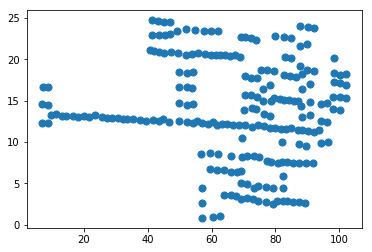

In [7]:
rem_pci_all = pd.read_csv("rsrp_set3.csv")
#rem_pci_all = pd.read_csv("rem_pci_train_pd.csv")
#rem_pci = pd.read_csv("rem_rsrp_train_pd.csv")
#rem_test = pd.read_csv("rem_test_pd.csv")
rem_pci_np = np.genfromtxt('rem_pci_train.csv', delimiter=',')
#rem_rsrp = pd.read_csv("rem_rsrp_train.csv")
print(rem_pci_all.head())
plt.scatter(rem_pci_all['x'], rem_pci_all['y'], s=50);

In [8]:
def group(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y','pci']).apply(pd.DataFrame.mode)
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

In [9]:
def group_pcimap(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y']).median()
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

            x        y  pci        rsrp        dis  zone
0      6.9175  12.3145   39 -116.585714  61.298020     4
1      6.9745  14.5660   39 -119.691304  61.273117     4
2      7.1470  16.6960   37 -115.000000  17.578927     1
3      8.6875  16.6570   37 -116.385714  16.065766     1
4      8.8135  12.2665   37 -119.250000  15.557783     1
5      8.8705  14.5180   39 -123.133333  59.376562     4
6      9.5515  13.3150   39 -124.860000  58.668269     4
7     11.0950  13.3945   37 -100.953333  13.258731     1
8     12.9850  13.1095   37  -96.856497  11.365038     1
9     14.5285  13.1890   37 -100.440870   9.822105     1
10    16.4245  13.1410   37  -98.876772   7.925735     1
11    18.2020  13.0960   37  -94.596491   6.148021     1
12    19.8640  13.1725   37  -90.343939   4.486954     1
13    21.6385  13.0090   37  -85.604851   2.712429     1
14    23.5435  13.3165   37  -83.239453   0.840461     1
15    25.5520  13.0285   37  -82.021795   1.203103     1
16    27.0895  12.8710   37  -8

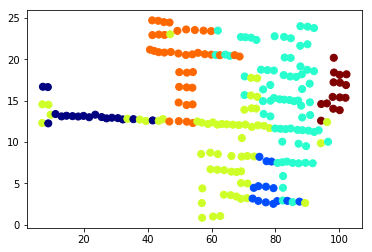

In [16]:
group_median,group_drift = group_pcimap(rem_pci_all)
#rsrp,group_drift = group(rem_rsrp)
#print("rem_rsrp==",rsrp)
#rem_rsrp.to_csv("rsrp.csv")
#group_median,group_drift = group(rem_test)
kmeans = KMeans(n_clusters=6)
#np.savetxt('group_median.csv', group_median, delimiter=',', fmt='%f')
#group_median = pd.read_csv("group_median.csv")
#print(rem_pci['pci'])

kmeans_fit = kmeans.fit(group_median)
y_kmeans = kmeans.predict(group_median)
#print(y_kmeans)
#print(y_kmeans.shape)

#print(y_kmeans_pd)

#add_kmeans = pd.merge(rem_pci,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans.to_csv('add_kmeans.csv')
#print(group_median)

plt.scatter(rem_pci_all['x'], rem_pci_all['y'], s=50, c=y_kmeans, cmap='jet');
y_kmeans_pd = pd.DataFrame({'zone':y_kmeans})
add_kmeans = pd.merge(rem_pci_all,y_kmeans_pd, left_index=True, right_index=True)
add_kmeans['zone'].replace(5,6,inplace=True)
add_kmeans['zone'].replace(4,5,inplace=True)
add_kmeans['zone'].replace(3,4,inplace=True)
add_kmeans['zone'].replace(2,3,inplace=True)
add_kmeans['zone'].replace(1,2,inplace=True)
add_kmeans['zone'].replace(0,1,inplace=True)
add_kmeans['pci'] = add_kmeans['pci'].map(lambda x:int(x/100))
print(add_kmeans)
add_kmeans.to_csv('aaa.csv')
add_kmeans.values[:,:]
np.savetxt('set3_part_train.csv', add_kmeans, delimiter=',', fmt='%f')
#y_kmeans = np.reshape(y_kmeans, (27, 105))
#np.savetxt('y_kmeans.csv', y_kmeans, delimiter=',', fmt='%f')
cluster_labels = kmeans_fit.labels_
silhouette_avg = metrics.silhouette_score(rem_pci_all, cluster_labels)
print(silhouette_avg)

In [60]:
def group_twice(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_mean = rem_pci.groupby(['x','y','pci','zone']).mean()
    return group_mean

In [6]:
#for twice kmeans
first_kmeans_result = np.genfromtxt('./data/bbb.csv', delimiter=',')
zone_0 = np.array([])
zone_1 = np.array([])
zone_2 = np.array([])
zone_3 = np.array([])
zone_4 = np.array([])
zone_5 = np.array([])
for i in range(0,len(first_kmeans_result)):
    if first_kmeans_result[i,3] == 0:
        zone_0 = np.append(zone_0,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 1:
        zone_1 = np.append(zone_1,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 2:
        zone_2 = np.append(zone_2,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 3:
        zone_3 = np.append(zone_3,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 4:
        zone_4 = np.append(zone_4,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 5:
        zone_5 = np.append(zone_5,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
print (zone_0)
a_0 = int(len(zone_0)/2)
a_1 = int(len(zone_1)/2)
a_2 = int(len(zone_2)/2)
a_3 = int(len(zone_3)/2)
a_4 = int(len(zone_4)/2)
a_5 = int(len(zone_5)/2)
d_0 = zone_0.reshape((a_0,2))
d_1 = zone_1.reshape((a_1,2))
d_2 = zone_2.reshape((a_2,2))
d_3 = zone_3.reshape((a_3,2))
d_4 = zone_4.reshape((a_4,2))
d_5 = zone_5.reshape((a_5,2))
print (d_0)
print (d_1)
print (d_2)
print (d_3)
print (d_4)
print (d_5)


[19.  8. 12.  2. 40.  5. 38. 16.]
[[19.  8.]
 [12.  2.]
 [40.  5.]
 [38. 16.]]
[[45.  3.]]
[[ 5. 12.]
 [88. 10.]]
[[20. 11.]
 [33. 21.]]
[[58. 20.]]
[]


In [ ]:
modelRegressor = KNeighborsRegressor(n_neighbors=3)
rsrp_pred = modelRegressor.fit(rsrp_train[:,0:-3], rsrp_train[:,-3:-1]).predict(data_test[:,0:-1])

In [ ]:
# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(rem_rsrp)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(rem_rsrp, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [ ]:
gmm = GMM(n_components=6).fit(rem_pci)
labels = gmm.predict(rem_pci)
plt.scatter(rem_pci['x'], rem_pci['y'], s=50, c=labels, cmap='jet');
print (labels)

In [ ]:
def group_kmeans(add_kmeans):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    kmeans = add_kmeans.groupby(['x','y','kmeans']).median()
    return kmeans

In [ ]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
 
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5

    return lng, lat
'''
kmeans = group_kmeans(add_kmeans)
#print(kmeans)
z = kmeans
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
z = np.reshape(z, (y_resolution, x_resolution))
'''

kmeans_append = np.zeros([len(rem_pci),6])
#print(add_kmeans.loc[range(10),'kmeans'])
np.savetxt('kmeans_append.csv', kmeans_append, delimiter=',', fmt='%f')


In [ ]:
#DNN model
pci_only = True
model = build_dNN_model(X_train, y_train, nb_feature, pci_only)
pci_only = False
model = build_dNN_model(X_train, y_train, nb_feature, pci_only)

In [ ]:
def build_knn_model(X_train, y_train):
    print ("+++KNN")
    model =  KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    #model =  KNeighborsRegressor(n_neighbors=3, weights='uniform', algorithm='auto')
    model.fit(X_train, y_train)
    #print "y_train==",y_train
    return model

In [ ]:
'''
merge_train = pd.read_csv('aaa.csv')
X = merge_train['x','y','pci']
y = iris.target
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)
'''

In [ ]:
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            #f.write(result)  # python will convert \n to os.linesep

#f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)
plt.show()
#plt.close('all')
#fig_pci = plt.pcolor(np.zeros([26, 106]), vmin=1, vmax=100, cmap='gist_ncar')
#plt.colorbar(heatmap_pci)
#plt.axis([0, 35, 0, 25])
'''
plt.axis('equal')
plt.axis('off')
plt.savefig('pci_map.png')
#plt.show()
'''

In [ ]:
'''
for i in range(len(add_kmeans)):
    if add_kmeans.loc[i,'kmeans'] == 0:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_0_append = kmeans_0_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 1:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_1_append = kmeans_1_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 2:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_2_append = kmeans_2_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 3:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_3_append = kmeans_3_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 4:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_4_append = kmeans_4_append.append(kmeans_merge)
print ("kmeans_0_append==",kmeans_0_append)
print ("kmeans_1_append==",kmeans_1_append)
print ("kmeans_2_append==",kmeans_2_append)
print ("kmeans_3_append==",kmeans_3_append)
print ("kmeans_4_append==",kmeans_4_append)
'''
